<img style="float: left;;" src='https://github.com/gdesirena/Procesamiento_Natural_del_Lenguaje_2024/blob/main/Modulo%20III/Figures/alinco.png?raw=1' /></a>

# Actividad 6: Predicción de Países



En esta actividad se abordará la exploración de vectores de palabras para la predicción de países.

En el procesamiento del lenguaje natural, representamos cada palabra como un vector que consta de números.
El vector codifica el significado de la palabra. Estos números (o pesos) para cada palabra se aprenden usando modelos de aprendizaje automático. En lugar de hacerte codificar el modelo de aprendizaje automático utilizaremos algunos vectores de palabras entrenados. En esta actividad se realizará lo siguiente:

- Predecir analogías entre palabras
- Usar el algoritmo de PCA que reduce la dimensionalidad de los wordembeddings para plotearlos en 2 dimensiones.
- Comparar los wordembeddings usando la métrica de la similitud por coseno.



###  Importando los datos

Como de costumbre, comienza importando algunas bibliotecas Python esenciales y luego carga el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns=['city1', 'country1', 'city2', 'country2']

data.head()

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [4]:
data.tail()

,city1,country1,city2,country2
4946,Zagreb,Croatia,Dakar,Senegal
4947,Zagreb,Croatia,Damascus,Syria
4948,Zagreb,Croatia,Dhaka,Bangladesh
4949,Zagreb,Croatia,Doha,Qatar
4950,Zagreb,Croatia,Dublin,Ireland


***
Tenga en cuenta que debido a que el conjunto de datos de de vectores palabras de Google News original es de aproximadamente 3,64 gigabytes, en este notebook no podríamos manejar el conjunto de archivos completo. Así que vamos a analizar un sample de wordembeddings qué está guardado en en un archivo pickle llamado `word_embeddings_capitals.p`

Si deseas descargar el conjunto de datos completo:

- Descargue el conjunto de datos de esta [página](https://code.google.com/archive/p/word2vec/).
- Busque en la página 'GoogleNews-vectors-negative300.bin.gz' y haga clic en el enlace para descargar.

Ya que tenemos los wordembeddings como un [diccionario de Python](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) hay que cargarlo.


In [5]:
word_embeddings = pickle.load(open('word_embeddings_subset.p','rb'))
word_embeddings

{'country': array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
        -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
        -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
         0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
         0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
        -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
         0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
        -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
        -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
         0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
         0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
         0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
         0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
        -0.03173828, -0.03417969, -0.011

Cada una de los wordembedings es un vector de 300 dimensiones.

In [6]:
len(word_embeddings)

243

In [8]:
word_embeddings['Funafuti'].shape

(300,)

### Predecir relaciones entre palabras


Ahora escribirá una función que utilizará los wordembeddings para predecir relaciones entre palabras.
* La función tomará como entrada tres palabras.
* Los dos primeros están relacionados entre sí.
* Predecirá una cuarta palabra que está relacionada con la tercera palabra de manera similar a como las dos primeras palabras están relacionadas entre sí.
* Como ejemplo, "Atenas es para Grecia como Bangkok es para ______"?
* Escribirás un programa que sea capaz de encontrar la cuarta palabra.


Una analogía similar sería la siguiente:

<img src = './Figures/vectors.jpg' width="width" height="height" style="width:467px;height:200px;"/>

Implementarás una función que te puede indicar la capital de un país.
Debe utilizar la misma metodología que se muestra en la figura anterior. Para hacer esto,
calcular primero calculará la métrica de similitud del coseno o la distancia euclidiana.

### Similitud por Coseno

La función de similitud del coseno es:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$ A $ y $ B $ representan los vectores de palabras y $ A_i $ o $ B_i $ representan el índice i de ese vector.
& Tenga en cuenta que si A y B son idénticos, obtendrá $ cos (\theta) = 1 $.

* De lo contrario, si son totalmente opuestos, es decir, $ A = -B $, obtendría $ cos (\theta) = -1 $.
* Si obtiene $ cos (\ theta) = 0 $, eso significa que son ortogonales (o perpendiculares).
* Los números entre 0 y 1 indican una puntuación de similitud.
* Los números entre -1-0 indican una puntuación de disimilitud.

**Instrucciones**: Implemente una función que tome dos vectores de palabras y calcule la distancia del coseno.

In [9]:
def cosine_similarity(A,B):
  dot = np.dot(A,B)
  nor_a = np.sqrt(np.dot(A,A))
  nor_b = np.sqrt(np.dot(B,B))

  cos = dot/(nor_a*nor_b)

  return cos

In [10]:
king = word_embeddings['king']
queen = word_embeddings['queen']


In [11]:
cosine_similarity(king,queen)

0.6510956

### Distancia Euclideana

Ahora implementará una función que calcula la similitud entre dos vectores usando la distancia euclidiana.
La distancia euclidiana se define como:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $ n $ es el número de elementos del vector
* $ A $ y $ B $ son los vectores de palabras correspondientes.
* Cuanto más similares sean las palabras, más probable será que la distancia euclidiana se acerque a 0.

**Instrucciones**: Escribe una función que calcule la distancia euclidiana entre dos vectores.

In [12]:
def euclidean(A,B):
  d = np.linalg.norm(A-B)
  return d

In [13]:
euclidean(king,queen)

2.4796925

###  Encontrar el país de cada capital

Ahora, usará las funciones anteriores para calcular similitudes entre vectores,
y utilícelos para encontrar las capitales de los países. Escribirás una función que
contiene tres palabras y el diccionario de wordembeddings. Tu tarea es encontrar el país dado las
ciudades capitales. Por ejemplo, dadas las siguientes palabras:

- 1: Athens 2: Greece 3: Baghdad,

su tarea es predecir el país 4: Irak.

**Instrucciones**:

1. Para predecir la capital, se podría implementar el esquema del ejemplo anterior * Rey - Hombre + Mujer = Reina * en una función matemática, utilizando los wordembeddings y una función de similitud.

2. Iterando en el diccionario de wordembeddings y calculando la similitud de coseno entre los vectores.

3. Al finalizar la función devuelve la palabra que tenga el score más alto.


In [18]:
def get_country(city1, country1, city2, embeddings):

  group = set((city1, country1, city2))
  #Obtener los embedings de city1, city2, country1
  city1_emb = embeddings[city1]
  city2_emb = embeddings[city2]
  country_emb = embeddings[country1]

  # king - man + woman = queen
  # country1 - city1 = country2 - city2
  # country1 - city1 + city2 = country2

  vec_country = country_emb - city1_emb + city2_emb

  precision = 0

  for word in embeddings.keys():
    if word not in group:
      # obtener el embdedding de la palabra
      word_emb = embeddings[word]
      #calcular el indice de similitud por coseno
      cos_pred = cosine_similarity(vec_country, word_emb)

      #guardar las similitudes de la palabra y su similaridad
      if cos_pred > precision:
        precision = cos_pred
        country = (word, precision)

  #retornamos country

  return country


In [19]:
get_country('Athens','Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

In [20]:

count=get_country('Athens', 'Greece', 'Cairo', word_embeddings)

In [21]:
count[0]

'Egypt'

### Accuracy del Modelo

Ahora probará su nueva función en el conjunto de datos y comprobará la precisión del modelo:

$$\text{Accuracy}=\frac{\text{Correct # of predictions}}{\text{Total # of predictions}}$$

**Instrucciones**: Escriba un programa que pueda calcular la precisión del conjunto de datos que se le proporcionó. Tienes que iterar sobre cada fila para obtener las palabras correspondientes e introducirlas en la función `get_country` anterior.

In [22]:
data

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt
...,...,...,...,...
4946,Zagreb,Croatia,Dakar,Senegal
4947,Zagreb,Croatia,Damascus,Syria
4948,Zagreb,Croatia,Dhaka,Bangladesh
4949,Zagreb,Croatia,Doha,Qatar


In [23]:
def get_accuracy(word_embeddings, data):
  num_correct = 0
  for i, row in data.iterrows():
    country_pred = get_country(row['city1'], row['country1'], row['city2'], word_embeddings)
    if country_pred[0] == row['country2']:
      num_correct+=1
  m = len(data)

  accuracy = num_correct/m

  return accuracy



In [25]:
accuracy = get_accuracy(word_embeddings, data)
print(f'Accuracy de la predicción: {accuracy:.3f}')

Accuracy de la predicción: 0.919


# Plotear los vectores usando PCA

Ahora utilizaremos la técnica conocida como [*principal component analysis* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) para reducir la dimensionalidad de nuestros vectores palabras.
Como vimos, estamos trabajando en un espacio de 300 dimensiones en este caso.
Aunque desde una perspectiva computacional pudimos realizar un buen trabajo,
es imposible visualizar resultados en espacios de dimensiones tan altos.

Podemos pensar en el algoritmo de PCA como un método que proyecta nuestros vectores en un espacio de dimensión menor, manteniendo la máxima información sobre los vectores originales.

Verá que cuando se mapeen las palabras, las palabras similares se agruparán
uno al lado del otro. Por ejemplo, las palabras 'triste', 'feliz', 'alegre' describen
emoción y se supone que están cerca el uno del otro cuando se ploteen.
Las palabras: "petróleo", "gas" y "petróleo" describen los recursos naturales.
Palabras como 'ciudad', 'aldea', 'pueblo' pueden verse como sinónimos y describen algo similar.


Antes de trazar las palabras, primero debe poder reducir cada vector de palabra
con PCA en 2 dimensiones y luego plotearlo. Los pasos para calcular el PCA son los siguientes:

1. Normalizar la media de los datos
2. Calcule la matriz de covarianza de sus datos ($ \ Sigma $).
3. Calcule los vectores propios y los autovalores de la matriz de covarianza.
4. Multiplique los primeros vectores propios K por sus datos normalizados. La transformación debería tener el siguiente aspecto:

<img src = './Figures/word_embf.jpg' width="width" height="height" style="width:800px;height:200px;"/>

**Instrucciones**:

Escribirás un programa que tome un conjunto de datos donde cada fila corresponde a un vector de palabra.
* Los vectores de palabras son de dimensión 300.
* Utilice PCA para cambiar las dimensiones 300 a dimensiones `n_components`.
* La nueva matriz debe ser de dimensión `m, n_componentns`.

* Primero restamos la media de los datos
* Obtenga los valores propios usando `linalg.eigh`. Utilice `eigh` en lugar de` eig`.
* Ordene los vectores y valores propios por orden decreciente por valores proipios.
* Obtenga un subconjunto de los valores propios (elija cuántos componentes principales desea usar usando `n_components`).
* Devuelve la nueva transformación de los datos multiplicando los vectores propios con los datos originales.



In [44]:
def compute_pca(X, n_components=2):
  X_mean = X - np.mean(X, axis=0)
  #Obtener la matriz de covarianzas
  covariance_mat = np.cov(X_mean, rowvar=False)
  #Obtener los eigenvectores y eigenvalores
  eigen_values, eigen_vec = np.linalg.eigh(covariance_mat, UPLO='L')
  #Ordenar de manera decreciente para obtener los valores propios que ofrecen mayor información en la dispersión de los datos
  idx_sort = np.argsort(eigen_values)
  idx_sort_decr = idx_sort[::-1]

  eigen_values_sorted = eigen_values[idx_sort_decr]
  eigen_vec_sorted = eigen_vec[:,idx_sort_decr]

  #elegimos el número de componentes
  eigen_vec_subset = eigen_vec_sorted[:,0:n_components] # Matriz de transformación T

  # x in R^n ---->T------> x_new R^2

  X_new = np.dot(eigen_vec_subset.transpose(), X_mean.transpose()).transpose() # Vectores transformados al nuevo espacio

  return X_new




In [45]:
# Test
np.random.seed(1)
X = np.random.rand(3,10)
X.shape

(3, 10)

In [46]:
X

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
        3.96767474e-01, 5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01, 2.04452250e-01, 8.78117436e-01,
        2.73875932e-02, 6.70467510e-01, 4.17304802e-01, 5.58689828e-01,
        1.40386939e-01, 1.98101489e-01],
       [8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
        8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02,
        1.69830420e-01, 8.78142503e-01]])

In [47]:
X_reduced = compute_pca(X, n_components=2)
X_reduced


array([[ 0.43437323, -0.49820384],
       [ 0.42077249,  0.50351448],
       [-0.85514571, -0.00531064]])


Ahora usará su función pca para plotear algunas palabras.
Verá que las palabras similares tienden a agruparse unas cerca de otras.
A veces, incluso los antónimos tienden a agruparse unos cerca de otros. Antónimos
describen lo mismo pero tienden a estar en el otro extremo de la escala
Por lo general, se encuentran en la misma ubicación de una oración,
tienen las mismas partes del discurso y, por lo tanto, cuando
Al aprender las palabras vectores, terminas obteniendo pesos similares.

In [48]:
len(word_embeddings)

243

In [49]:
def get_vectors(embeddings, words):
  n = len(embeddings['king'])
  X=np.zeros((1,n))

  for word in words:
    word_emb = embeddings[word]

    X = np.row_stack((X,word_emb))

  Xword = X[1:,:]

  return Xword

In [50]:
words = ['oil', 'gas', 'sad', 'happy', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

In [51]:
X = get_vectors(word_embeddings, words)

In [52]:
result = compute_pca(X)

In [53]:
result

array([[ 1.9992826 , -0.30306525],
       [ 1.78935823, -0.13213852],
       [-1.37001709, -1.56221253],
       [-1.16829142, -1.10269641],
       [-0.76919576,  1.34657564],
       [-0.90853428,  1.7810335 ],
       [-0.34263439,  0.64509189],
       [-0.24731462,  0.96364767],
       [ 2.23795585, -0.42506411],
       [-1.22060911, -1.21117186]])

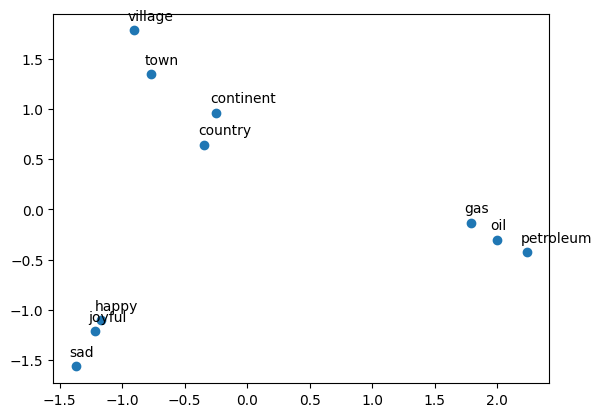

In [54]:
result = compute_pca(X,2)
plt.scatter(result[:,0], result[:,1])
for i,word in enumerate(words):
  plt.annotate(word, xy = (result[i,0] -0.05, result[i,1]+0.1))
plt.show()

In [ ]:
# 1.- obtener los vectores transformados en 3D y vuisualizarlos utilizando matplotlib
# 2.- apartir de la predicción de count=get_country('Athens', 'Greece', 'Cairo', word_embeddings)
#        count = 'Egipt'
#        words_city_country = ['Athens', 'Greece', 'Cairo', count]
#        Aplicar pca a words_city_country y visualizarlos en 2D

